In [2]:
import typing_extensions
import importlib.metadata
print(importlib.metadata.version("typing_extensions"))


4.15.0


In [3]:
import pandas as pd

In [6]:
# Load datasets
pcos_df = pd.read_excel("../data/tabular/PCOS.xlsx")
infertility_df = pd.read_excel("../data/tabular/PCOS_infertility.xlsx")

In [7]:
print("PCOS dataset shape:", pcos_df.shape)
print("Infertility dataset shape:", infertility_df.shape)

PCOS dataset shape: (541, 45)
Infertility dataset shape: (541, 6)


In [8]:
pcos_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [9]:
infertility_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [13]:
pcos_df.rename(columns={"PCOS (Y/N)": "PCOS"}, inplace=True)




In [14]:
pcos_df["PCOS"].value_counts()


PCOS
0    364
1    177
Name: count, dtype: int64

In [15]:
pcos_df["PCOS"].value_counts(normalize=True) * 100


PCOS
0    67.28281
1    32.71719
Name: proportion, dtype: float64

In [16]:
missing = pcos_df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


Unnamed: 44              539
Fast food (Y/N)            1
Marraige Status (Yrs)      1
dtype: int64

In [17]:
pcos_df.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS                        int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [20]:
pcos_df.drop(columns=["Unnamed: 44"], inplace=True)

In [21]:
pcos_df["Fast food (Y/N)"].fillna(
    pcos_df["Fast food (Y/N)"].mode()[0],
    inplace=True
)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15684\610962144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pcos_df["Fast food (Y/N)"].fillna(


In [22]:
pcos_df["Marraige Status (Yrs)"].fillna(
    pcos_df["Marraige Status (Yrs)"].median(),
    inplace=True
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15684\2790794184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pcos_df["Marraige Status (Yrs)"].fillna(


In [23]:
pcos_df["II    beta-HCG(mIU/mL)"].unique()[:10]
pcos_df["AMH(ng/mL)"].unique()[:10]


array([2.07, 1.53, 6.63, 1.22, 2.26, 6.74, 3.05, 1.54, 1, 1.61],
      dtype=object)

In [24]:
pcos_df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(
    pcos_df["II    beta-HCG(mIU/mL)"],
    errors="coerce"
)

pcos_df["AMH(ng/mL)"] = pd.to_numeric(
    pcos_df["AMH(ng/mL)"],
    errors="coerce"
)


In [25]:
pcos_df[["II    beta-HCG(mIU/mL)", "AMH(ng/mL)"]].isnull().sum()


II    beta-HCG(mIU/mL)    1
AMH(ng/mL)                1
dtype: int64

In [26]:
pcos_df.drop(columns=["Sl. No", "Patient File No."], inplace=True)


In [27]:
pcos_df.isnull().sum().sort_values(ascending=False).head(10)


AMH(ng/mL)                1
II    beta-HCG(mIU/mL)    1
Hair loss(Y/N)            0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
dtype: int64

In [28]:
pcos_df.shape


(541, 42)

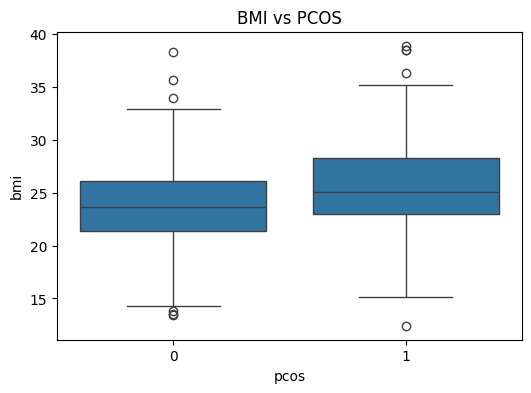

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x="pcos", y="bmi", data=pcos_df)
plt.title("BMI vs PCOS")
plt.show()


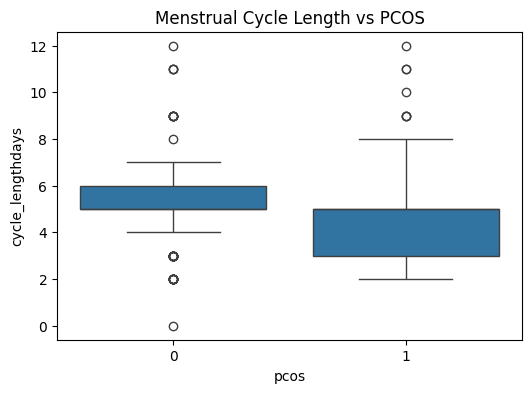

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x="pcos", y="cycle_lengthdays", data=pcos_df)
plt.title("Menstrual Cycle Length vs PCOS")
plt.show()


In [31]:
pcos_df.columns = (
    pcos_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)


In [32]:
pcos_df.columns


Index(['pcos', 'age_yrs', 'weight_kg', 'heightcm', 'bmi', 'blood_group',
       'pulse_ratebpm', 'rr_breaths/min', 'hbg/dl', 'cycler/i',
       'cycle_lengthdays', 'marraige_status_yrs', 'pregnanty/n',
       'no._of_aborptions', 'i___beta-hcgmiu/ml', 'ii____beta-hcgmiu/ml',
       'fshmiu/ml', 'lhmiu/ml', 'fsh/lh', 'hipinch', 'waistinch',
       'waist:hip_ratio', 'tsh_miu/l', 'amhng/ml', 'prlng/ml', 'vit_d3_ng/ml',
       'prgng/ml', 'rbsmg/dl', 'weight_gainy/n', 'hair_growthy/n',
       'skin_darkening_y/n', 'hair_lossy/n', 'pimplesy/n', 'fast_food_y/n',
       'reg.exercisey/n', 'bp__systolic_mmhg', 'bp__diastolic_mmhg',
       'follicle_no._l', 'follicle_no._r', 'avg._f_size_l_mm',
       'avg._f_size_r_mm', 'endometrium_mm'],
      dtype='object')

In [36]:
pcos_df.head()

,pcos,age_yrs,weight_kg,heightcm,bmi,blood_group,pulse_ratebpm,rr_breaths/min,hbg/dl,cycler/i,...,pimplesy/n,fast_food_y/n,reg.exercisey/n,bp__systolic_mmhg,bp__diastolic_mmhg,follicle_no._l,follicle_no._r,avg._f_size_l_mm,avg._f_size_r_mm,endometrium_mm
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
